#### How to read images in a folder

readImages.ipynb and trafficLightImages folder is being provided to help those who may need a little help in reading images from a file. There are many ways to read images and I am providing one example. The assumption is that the readImages.ipynb and trafficLightImages folder is in the same directory. Examine the directory structure of traffiLightImages folder. Also examine the images by clicking on them, just as you would clickin on any .jpg file.

In [1]:
import random
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # for loading in images

%matplotlib inline

#### Import images in a list from a file

Notice the trafficLightImages/training/green has 4 files and we can verify the 4 file shave been read.

In [2]:
im_list_green=[]

for file in glob.glob("trafficLightImages/training/green/*"):
    
    # Read in the image
    im = mpimg.imread(file)   
            
    # Append the image to the green image list
    im_list_green.append(im)
    
print(len(im_list_green))

4


#### Explore the data

Notice the image is 73X46X3 (the 3 is for RGB)
We will also explore the shape to verify the dimensions

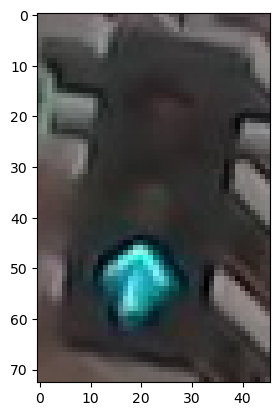

In [3]:
plt.imshow(im_list_green[0])

In [4]:
print(im_list_green[0].shape)
print(len(im_list_green[0]))
print(len(im_list_green[0][1]))
print(len(im_list_green[0][1][2]))
print("73", im_list_green[0])
print("46", im_list_green[1])
print("3", im_list_green[2])

(73, 46, 3)
73
46
3
73 [[[112 106 106]
  [112 106 106]
  [116 110 110]
  ...
  [ 86  77  80]
  [ 83  72  76]
  [ 90  79  83]]

 [[109 103 103]
  [111 105 105]
  [116 110 110]
  ...
  [ 89  78  82]
  [ 96  85  89]
  [ 94  83  87]]

 [[111 107 106]
  [112 108 107]
  [114 110 109]
  ...
  [ 80  69  73]
  [ 94  83  87]
  [ 96  86  87]]

 ...

 [[ 96  79  72]
  [ 96  79  72]
  [ 96  79  72]
  ...
  [ 61  52  53]
  [ 68  59  60]
  [ 63  54  55]]

 [[ 97  80  72]
  [ 97  80  72]
  [ 97  80  72]
  ...
  [ 54  45  46]
  [ 62  53  54]
  [ 63  54  55]]

 [[ 98  81  73]
  [ 97  80  72]
  [ 97  80  72]
  ...
  [ 31  22  23]
  [ 64  55  56]
  [ 85  76  77]]]
46 [[[118 125 133]
  [115 122 130]
  [115 122 130]
  ...
  [125 135 144]
  [124 134 143]
  [123 133 142]]

 [[111 118 128]
  [112 119 127]
  [117 124 132]
  ...
  [120 130 139]
  [120 130 139]
  [119 129 138]]

 [[111 118 128]
  [106 113 123]
  [105 112 122]
  ...
  [119 128 137]
  [119 128 137]
  [118 127 136]]

 ...

 [[151 165 176]
  [151 165

#### Preprocess the data
Standardize the image to 32X32X3 and verify the dimesions of the standardized image. It is of utmost importance that all images are of the same dimensions for training and testing the model. 

In [5]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image):
    image_crop = np.copy(image)
    row_crop = 7
    col_crop = 8
    image_crop = image[row_crop:-row_crop, col_crop:-col_crop, :]
    ## TODO: Resize image and pre-process so that all "standard" images are the same size
    standard_im = cv2.resize(image_crop, (32, 32))
    return standard_im

In [7]:
!pip install opencv-python

import cv2 # helper functions

std_img = standardize_input(im_list_green[0])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 26.4 MB/s eta 0:00:0000:0100:01


(32, 32, 3)


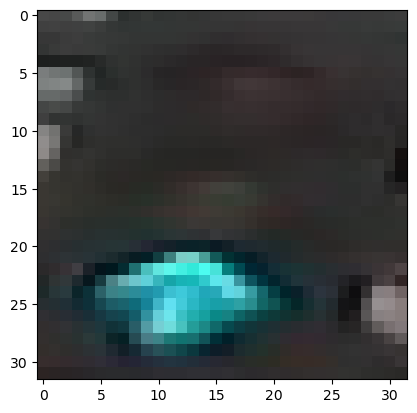

In [8]:
print(std_img.shape)
plt.imshow(std_img)

Please ask questions if something does not make sense. You are alomost ready to train the model, but not quite. Review model.fit usage. What is missing? 

Here is what is missing: 

1. Combining all the class images into one unified list
2. Standardize the unified list (if not already standardized)
3. Append the label (if the data is not labeled)
4. Shuffle the list (random.suffle)
5. Split into training and labels (for model.fit(X, y))
6. Define model (use Fashion MNIST model)
7. Compile the model (use Fashion MNIST model)
8. Train the model (model.fit(training, labels))
9. Testing the model with testing data
10. Use the model to predict class of images never see before by the model       